In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [18]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("{} train samples and {} test samples\n".format(len(x_train), len(x_test)))
print("train samples shape:", x_train.shape)
print("train labels shape:", y_train.shape)

50000 train samples and 10000 test samples

train samples shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


In [19]:
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

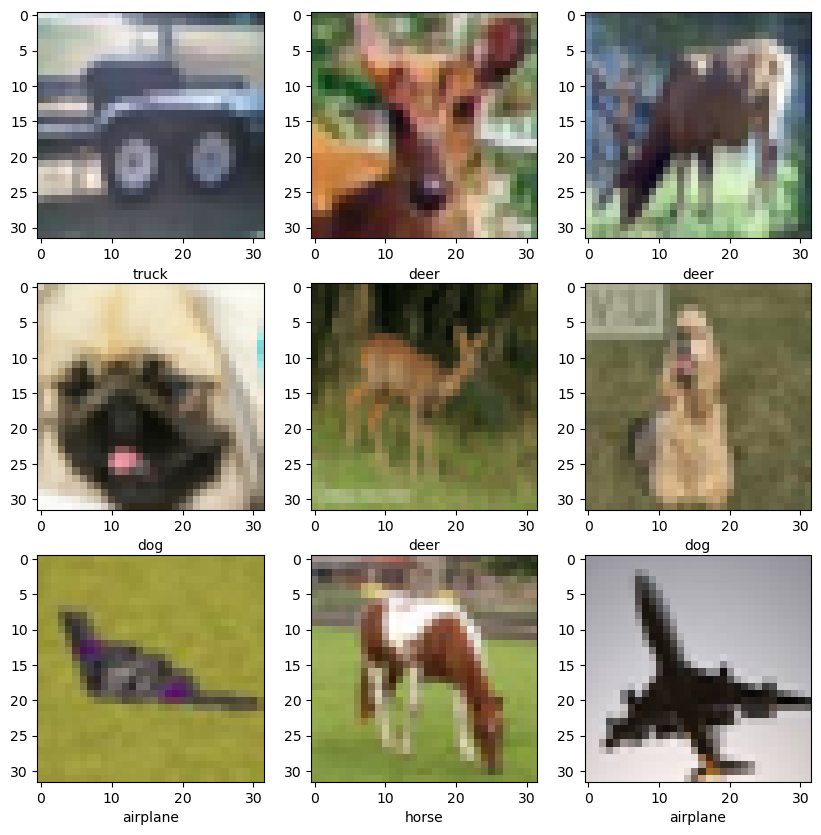

In [20]:
# select a random set of 9 images
idx = np.random.randint(len(x_train) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each sample
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i + idx])
    plt.xlabel(class_names[(y_train[i + idx][0])])

# display results
plt.show()

In [21]:
# pixel values before normalization
print("before normalization:\n", x_train[0][0][0])

before normalization:
 [59 62 63]


In [22]:
# normalize pixel values
x_train = x_train / 255.
x_test = x_test / 255.
# pixel values after normalization
print("after normalization:\n", x_train[0][0][0])

after normalization:
 [0.23137255 0.24313725 0.24705882]


In [23]:
# label values before one hot encoding
print("before one hot:")
print("class {} represents a {}".format(y_train[0][0], class_names[y_train[0][0]]))

before one hot:
class 6 represents a frog


In [24]:
from keras.utils import to_categorical

# one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# label values after one hot encoding
print("after one hot:")
print("class {} represents a {}".format(y_train[0], class_names[np.argmax(y_train[0])]))

after one hot:
class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] represents a frog


In [25]:
from tensorflow.keras import Sequential, layers

def build_model():
    model = Sequential()
    model.add(layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, 5, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    model.add(layers.Softmax())

    model.compile(
        optimizer ='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])
    return model

In [26]:
# create model
model = build_model()
# see model details
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [27]:
%%time
# train model
history = model.fit(x_train, y_train, epochs=10)
# save model to file
model.save('baseline.keras')

# access metrics from training history
print("\ninitial accuracy: {} | latest accuracy: {}".format(history.history["accuracy"][0], history.history["accuracy"][-1]))
print("initial loss: {} | latest loss: {}".format(history.history["loss"][0], history.history["loss"][-1]))

Epoch 1/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4001 - accuracy: 0.4994
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0542 - accuracy: 0.6309
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9258 - accuracy: 0.6746
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8489 - accuracy: 0.7041
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7857 - accuracy: 0.7248
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7292 - accuracy: 0.7432
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6819 - accuracy: 0.7597
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6392 - accuracy: 0.7762
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5942 - accuracy: 0.7904
Epoch 10/10
1563/1563 [==============================] - 33s 21m

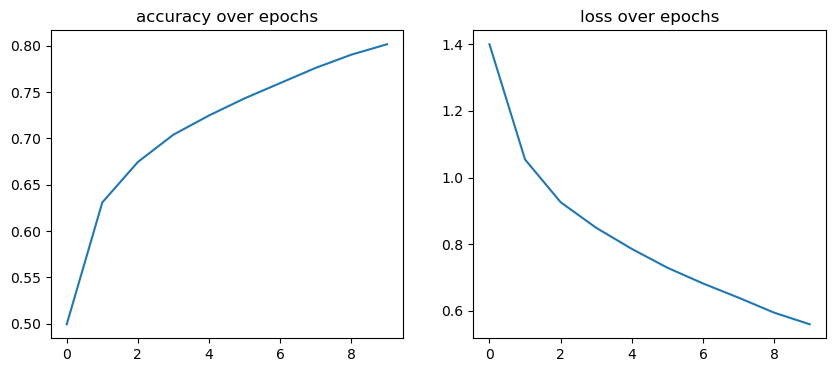

In [28]:
fig, axis = plt.subplots(1, 2, figsize=(10,4))
# plot accuracy
axis[0].plot(history.history["accuracy"])
axis[0].set_title("accuracy over epochs")
# plot loss
axis[1].plot(history.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\ntest accuracy score:', test_acc)

313/313 - 2s - loss: 0.9249 - accuracy: 0.6973 - 2s/epoch - 6ms/step

test accuracy score: 0.6973000168800354


In [30]:
predictions = model.predict(x_test)
# fetch probabilities for each class
print("\nprediction probabilities per class:\n", predictions[0])
# fetch class with the highest probability
print("\npredicted class:", np.argmax(predictions[0]))
print("actual class:", np.argmax(y_test[0]))
# fetch readable class name
print("predicted class name:", class_names[np.argmax(predictions[0])])
# compare with original label
print("actual class name:", class_names[np.argmax(y_test[0])])

313/313 [==============================] - 2s 7ms/step

prediction probabilities per class:
 [1.01321260e-03 2.46832753e-03 1.20722642e-03 8.59118775e-02
 1.35719692e-05 2.32217200e-02 8.05437216e-04 1.19566885e-05
 8.76897156e-01 8.44947156e-03]

predicted class: 8
actual class: 3
predicted class name: ship
actual class name: cat


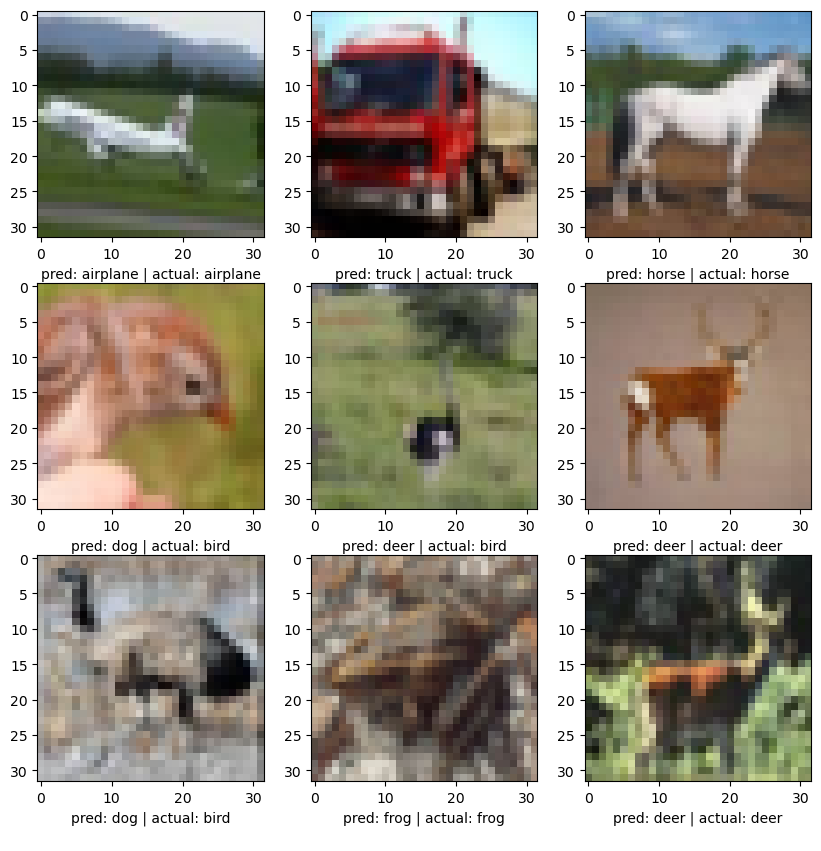

In [31]:
# select a random set of 9 test images
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each test image along with its prediction
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i + idx])
    plt.xlabel("pred: {} | actual: {}\n".format(class_names[np.argmax(predictions[i + idx])], class_names[np.argmax(y_test[i + idx])]))

# display results
plt.show()